In [4]:
import pandas as pd
path = '/Data/oneshotlearning/two_better_than_one/data.csv'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dc
from sklearn.tree import export_text as et
from sklearn.metrics import classification_report as cls_rep
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(path)

In [7]:
df.head(5)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [8]:
len(df.columns), df.columns

(11,
 Index(['type_school', 'school_accreditation', 'gender', 'interest',
        'residence', 'parent_age', 'parent_salary', 'house_area',
        'average_grades', 'parent_was_in_college', 'will_go_to_college'],
       dtype='object'))

In [9]:
df.isna().sum().sum()

0

In [10]:
df_str = df.select_dtypes(include='object')
df_str

,type_school,school_accreditation,gender,interest,residence
0,Academic,A,Male,Less Interested,Urban
1,Academic,A,Male,Less Interested,Urban
2,Academic,B,Female,Very Interested,Urban
3,Vocational,B,Male,Very Interested,Rural
4,Academic,A,Female,Very Interested,Urban
...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural
996,Academic,B,Female,Less Interested,Rural
997,Vocational,A,Male,Less Interested,Urban
998,Academic,B,Male,Uncertain,Rural


In [11]:
for col in df_str.columns:
    print(col, df_str[col].unique())

type_school ['Academic' 'Vocational']
school_accreditation ['A' 'B']
gender ['Male' 'Female']
interest ['Less Interested' 'Very Interested' 'Uncertain' 'Not Interested'
 'Interested']
residence ['Urban' 'Rural']


In [12]:
#they actually transformed the exsitnace or nonexistance of object feature to numerical feature.
#if it it just 2 it was binary, else 0-4 since there were 5
def preprocess(df):
    df_str = df.select_dtypes(include='object')
    enc = OrdinalEncoder(categories = [
        df_str[col].unique() if col != 'interest' else[
            'Less Interested', 'Very Interested' ,'Uncertain', 'Not Interested', 'Interested']

    for col in df_str.columns])
    df = pd.concat([
        pd.DataFrame(enc.fit_transform(df_str), columns=df_str.columns, index=df_str.index), df.select_dtypes(exclude='object')], axis=1)

    return df.drop(columns=['will_go_to_college']), df['will_go_to_college']
    

    
        

In [13]:
preprocess(df)

(     type_school  school_accreditation  gender  interest  residence  \
 0            0.0                   0.0     0.0       0.0        0.0   
 1            0.0                   0.0     0.0       0.0        0.0   
 2            0.0                   1.0     1.0       1.0        0.0   
 3            1.0                   1.0     0.0       1.0        1.0   
 4            0.0                   0.0     1.0       1.0        0.0   
 ..           ...                   ...     ...       ...        ...   
 995          1.0                   0.0     1.0       1.0        1.0   
 996          0.0                   1.0     1.0       0.0        1.0   
 997          1.0                   0.0     0.0       0.0        0.0   
 998          0.0                   1.0     0.0       2.0        1.0   
 999          0.0                   1.0     0.0       4.0        0.0   
 
      parent_age  parent_salary  house_area  average_grades  \
 0            56        6950000        83.0           84.09   
 1      

In [14]:
# One model to rule them all!

In [15]:
np.random.seed(13)

In [16]:
train, test = train_test_split(df, test_size=0.3)

In [17]:
train_x, train_y = preprocess(train)
test_x, test_y = preprocess(test)

In [18]:
cls = dc()
cls.fit(train_x, train_y)
print('\n', cls_rep(cls.predict(test_x), test_y))


               precision    recall  f1-score   support

       False       0.77      0.78      0.78       149
        True       0.78      0.77      0.78       151

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [19]:
keys, values = df.columns, list(100*cls.feature_importances_)

In [20]:
dict_features = dict(zip(keys, values))
print('\n',dict_features) 


 {'type_school': 1.489330133468062, 'school_accreditation': 0.1904761904761905, 'gender': 0.1904761904761905, 'interest': 5.434719494832475, 'residence': 5.032889563955828, 'parent_age': 2.8881976780281846, 'parent_salary': 18.671516954943367, 'house_area': 20.234443722722816, 'average_grades': 42.1112949615006, 'parent_was_in_college': 3.756655109596286}


In [21]:
{k: v for k, v in sorted(dict_features.items(), key=lambda item: item[1])}

{'school_accreditation': 0.1904761904761905,
 'gender': 0.1904761904761905,
 'type_school': 1.489330133468062,
 'parent_age': 2.8881976780281846,
 'parent_was_in_college': 3.756655109596286,
 'residence': 5.032889563955828,
 'interest': 5.434719494832475,
 'parent_salary': 18.671516954943367,
 'house_area': 20.234443722722816,
 'average_grades': 42.1112949615006}

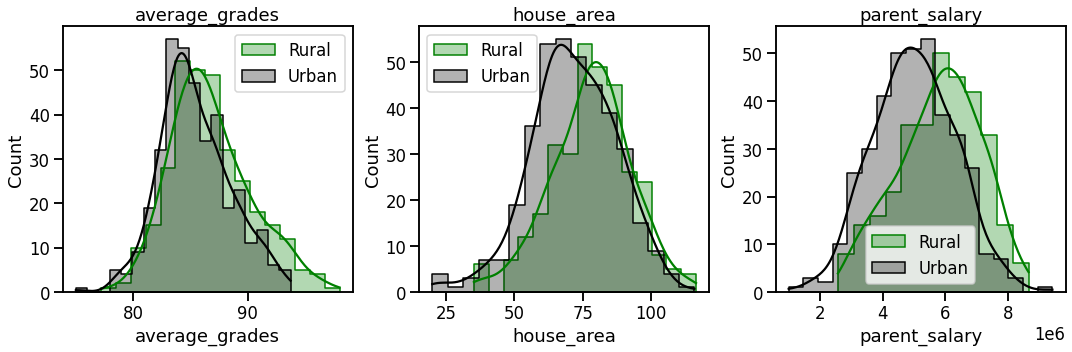

In [22]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))

for cur_ax, feature in zip(axes, ['average_grades', 'house_area', 'parent_salary']):
    sns.histplot(train[train['residence']=='Rural'][feature],
                 color='green',
                 label='Rural',
                 element='step',
                 kde=True,
                 alpha=0.3,
                 ax=cur_ax)
    
    sns.histplot(train[train['residence']=='Urban'][feature],
             color='black',
             alpha=0.3,
             label='Urban',
             element='step',
             kde=True,
             ax=cur_ax)
    cur_ax.set_title(feature)
    cur_ax.legend()
fig.tight_layout()
fig.show()

In [23]:
# I am at 17 minutes of lecture 5

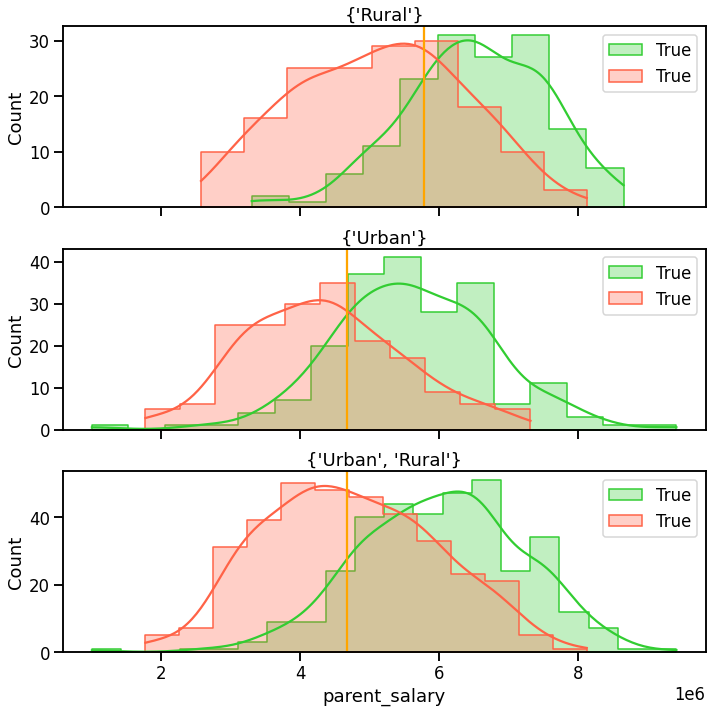

In [24]:
fig, axes = plt.subplots(nrows=3, figsize=(10,10), sharex=True)

for cur_ax, residence_values in zip(axes, [{'Rural'},{'Urban'}, {'Rural','Urban'}]):
    subset = train[train['residence'].isin(residence_values)]
    sns.histplot(subset[subset['will_go_to_college']]['parent_salary'],
                 color='limegreen',
                 label='True',
                 element='step',
                 kde=True,
                 alpha=0.3,
                 ax=cur_ax)
    
    sns.histplot(subset[~subset['will_go_to_college']]['parent_salary'],
                 color='tomato',
                 label='True',
                 element='step',
                 kde=True,
                 alpha=0.3,
                 ax=cur_ax)
    threshold = (
        dc(max_depth=1).fit(subset[['parent_salary']], subset['will_go_to_college'])
        .tree_.threshold[0]
                           )
    cur_ax.axvline(threshold, color = 'orange')
    cur_ax.set_title(residence_values)
    cur_ax.legend()
fig.tight_layout()
fig.show()

In [25]:
# what is decision threshold to this subset? it implements the importance of certain features that the 
# desicion tree did not based on 
print(et(cls, feature_names=list(train_x.columns)))
rep = et(cls, feature_names=list(train_x.columns))

# it shows that residence feature is down at model feature selection
# Meaning, it is relative not important in desicion making.
# we will force the model to use it higher in the tree

|--- average_grades <= 86.81
|   |--- parent_salary <= 4665000.00
|   |   |--- average_grades <= 78.88
|   |   |   |--- house_area <= 53.90
|   |   |   |   |--- class: False
|   |   |   |--- house_area >  53.90
|   |   |   |   |--- class: True
|   |   |--- average_grades >  78.88
|   |   |   |--- house_area <= 77.60
|   |   |   |   |--- house_area <= 44.40
|   |   |   |   |   |--- parent_age <= 54.00
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- parent_age >  54.00
|   |   |   |   |   |   |--- class: True
|   |   |   |   |--- house_area >  44.40
|   |   |   |   |   |--- average_grades <= 81.82
|   |   |   |   |   |   |--- average_grades <= 81.75
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- average_grades >  81.75
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- average_grades >  81.82
|   |   |   |   |   |   |--- class: False
|   |   |   |--- house_area >  77.60
|   |   |   |   |--- parent_was_in_college <= 0.50
| 

In [26]:
# Two models to rule them all!

In [27]:
for residence_values in ['Rural', 'Urban']:
    train_x, train_y = preprocess(train[train['residence']== residence_values])
    test_x, test_y = preprocess(test[test['residence'] == residence_values])
    
    model = dc().fit(train_x, train_y)
    
    print(residence_values)
    print(cls_rep(model.predict(test_x), test_y))


Rural
              precision    recall  f1-score   support

       False       0.77      0.89      0.83        57
        True       0.92      0.82      0.87        85

    accuracy                           0.85       142
   macro avg       0.85      0.86      0.85       142
weighted avg       0.86      0.85      0.85       142

Urban
              precision    recall  f1-score   support

       False       0.82      0.84      0.83        82
        True       0.82      0.80      0.81        76

    accuracy                           0.82       158
   macro avg       0.82      0.82      0.82       158
weighted avg       0.82      0.82      0.82       158



# RCM & SVM

In [28]:
# train_1_x, train_1_y = preprocess(train[train['residence'] == 'Urban'])
# test_1_x, test_1_y = preprocess(test[test['residence'] == 'Urban'])

# train_2_x, train_2_y = preprocess(train[train['residence'] == 'Rural'])
# test_2_x, test_2_y = preprocess(test[test['residence'] == 'Rural'])

train_1_x, train_1_y = preprocess(train[:len(train) // 2])
test_1_x, test_1_y = preprocess(test[:len(test) // 2])

train_2_x, train_2_y = preprocess(train[len(train) // 2 :])
test_2_x, test_2_y = preprocess(test[len(test) // 2 :])

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_1_x, train_1_y)

RandomForestClassifier()

In [31]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_2_x = scaler.fit_transform(train_2_x)
test_2_x = scaler.transform(test_2_x)

svm = SVC(probability=True)
svm.fit(train_2_x, train_2_y)


SVC(probability=True)

In [32]:
preds_1 = rfc.predict_proba(test_1_x)[:,1]
preds_2 = svm.predict_proba(test_2_x)[:,1]                          

In [33]:
def combine_preds(preds_1, preds_2):
    top_k = 50
    df = (
        pd.DataFrame({
            'pred': np.concatenate([preds_1, preds_2]),
            'model': [1] * len(preds_1) + [2] * len(preds_2)
        })
        .sort_values('pred', ascending=False)
        .iloc[:top_k]
    )

    print('frac of model1: ', (df['model']==1).mean())
    return df.style.background_gradient(subset='model', cmap='Pastel2')
combine_preds(preds_1, preds_2)

frac of model1:  0.34


,pred,model
265,0.999997,2
178,0.999997,2
165,0.999996,2
185,0.999990,2
280,0.999990,2
255,0.996544,2
249,0.996335,2
294,0.994030,2
156,0.992707,2
283,0.992588,2


# we need to calibrate model probabilities in order to be able to compare them together

In [38]:
from sklearn.calibration import CalibratedClassifierCV

In [39]:
calibrated_rfc = CalibratedClassifierCV(rfc, cv=5)# cv is cross validation, in this case it will train 5
calibrated_rfc.fit(train_1_x, train_1_y)
calibrated_rfc_preds = calibrated_rfc.predict_proba(test_1_x)[:,1]


In [40]:
calibrated_svm = CalibratedClassifierCV(svm, cv=5)# cv is cross validation, in this case it will train 5
calibrated_svm.fit(train_2_x, train_2_y)
calibrated_svm_preds = calibrated_svm.predict_proba(test_2_x)[:,1]

## Scanity: we divide arbitraryly the data not according to feature selection and we will hope to get 50/50 between the models

In [42]:
combine_preds(calibrated_svm_preds, calibrated_rfc_preds)

frac of model1:  0.54


,pred,model
28,0.995155,1
115,0.994803,1
15,0.994315,1
35,0.992626,1
130,0.989477,1
105,0.988480,1
99,0.987085,1
144,0.983761,1
133,0.978045,1
79,0.974132,1
